**Write TensorFlow program  to  create a Binary image classifier for the given data to classify images to  indoor and outdoor images. Use Keras API to create the multilayer neural network model.**  



**Try out various configurations for the model and number of epochs for training and submit the code with the best possible accuracy.**  



**Submit only the jupyter notebook.**  

 

**Data set :**

- Downloaded images from google
- Indoor photos – 250 , outdoor photos- 300

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.6.0'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(rotation_range=30, shear_range=0.2, width_shift_range=2, zoom_range=0.3, 
                            vertical_flip=True, rescale=1./255)

In [5]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
!ls Photographs

test       train      validation


In [7]:
train_generator = train_datagen.flow_from_directory(
        'Photographs/train',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        'Photographs/validation',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 400 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense,Conv2D,MaxPooling2D

In [9]:
## Initialising the CNN
classifier = Sequential()

2022-01-26 21:02:49.809575: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
classifier.add(Conv2D(64,(3,3),input_shape = (150,150,3), activation = 'relu'))
## MaxPooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [11]:
## Flattening
classifier.add(Flatten())

In [12]:
## Fully connected ANN, Hidden ANN and output layer
classifier.add(Dense(units = 128, activation = 'relu'))

In [13]:
#output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [14]:
## Compliling
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [15]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [16]:
train_generator.class_indices

{'indoor': 0, 'outdoor': 1}

In [17]:
## fitting model to images
history = classifier.fit(train_generator,epochs=50,validation_data=validation_generator)

2022-01-26 21:02:51.611352: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
13/13 [==============================] - 24s 2s/step - loss: 0.8197 - accuracy: 0.5625 - val_loss: 0.4975 - val_accuracy: 0.6000
Epoch 2/50
13/13 [==============================] - 20s 1s/step - loss: 0.3885 - accuracy: 0.8575 - val_loss: 0.2237 - val_accuracy: 0.9200
Epoch 3/50
13/13 [==============================] - 22s 2s/step - loss: 0.4200 - accuracy: 0.8250 - val_loss: 0.3231 - val_accuracy: 0.8600
Epoch 4/50
13/13 [==============================] - 19s 1s/step - loss: 0.3324 - accuracy: 0.8425 - val_loss: 0.1467 - val_accuracy: 0.9400
Epoch 5/50
13/13 [==============================] - 20s 2s/step - loss: 0.2690 - accuracy: 0.9025 - val_loss: 0.1855 - val_accuracy: 0.9600
Epoch 6/50
13/13 [==============================] - 19s 1s/step - loss: 0.1785 - accuracy: 0.9325 - val_loss: 0.0797 - val_accuracy: 0.9800
Epoch 7/50
13/13 [==============================] - 19s 1s/step - loss: 0.1435 - accuracy: 0.9400 - val_loss: 0.1202 - val_accuracy: 0.9600
Epoch 8/50
13/13 [==

In [18]:
from tensorflow.keras.preprocessing import image

In [19]:
image_name = 'outdoor/5ce408eb2218f357aefad979.w800.jpg'

In [20]:
## prediction of single new data

test_image = image.load_img('Photographs/test/'+image_name ,target_size =(150,150))

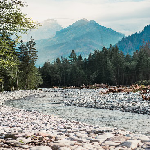

In [21]:
test_image

In [22]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [23]:
## For single prediction change the dimension . 

test_image=test_image.reshape(1,150,150,3)

In [24]:
result = classifier.predict(test_image)

In [25]:
result=np.around(result)

<IPython.core.display.Javascript object>

In [26]:
## Class label of indoor and outdoor
if result == 1:
    prediction = 'This is an outdoor scene'
else:
    prediction = 'This is an indoor scene'

In [27]:
prediction

'This is an outdoor scene'

In [28]:
classifier.get_config

<bound method Sequential.get_config of <keras.engine.sequential.Sequential object at 0x7ff02bfc66d0>>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

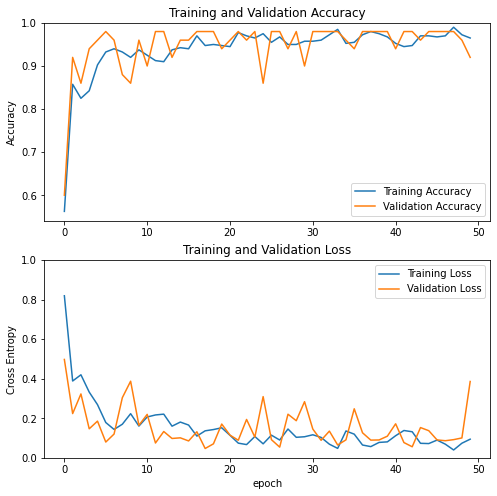

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()